In [1]:
import time
import os

import numpy as np
import cv2
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

import pyautogui

In [2]:
certificate_password = os.getenv('CERTIFICATE_PASSWROD')
driver_path = os.getenv("DRIVER_PATH")

In [3]:
def template_match(img_grey, template):
    res = cv2.matchTemplate(img_grey, template, cv2.TM_CCOEFF_NORMED)
    threshold = get_threshold(res)
    result = np.where(res > threshold)
    result = zip(*result[::-1])
    return list(result)[0]

def get_click_location(template, res):
    w, h = template.shape[::-1]
    return (res[0] + w / 2, res[1] + h / 2)

def draw_rectangle(original, template, res):
    w, h = template.shape[::-1]
    cv2.rectangle(original, res, (res[0] + w, res[1] + h), (0,0,255), 2)

def get_threshold(nd_array):
    threshold = 0.6
    while not select_specific_position(nd_array, threshold):
        print(threshold)
        threshold += 0.02
    
    return threshold

def select_specific_position(nd_array, threshold):
    tmp_array = np.where(nd_array > threshold)
    if len(tmp_array) == 2:
        return True
    else:
        return False

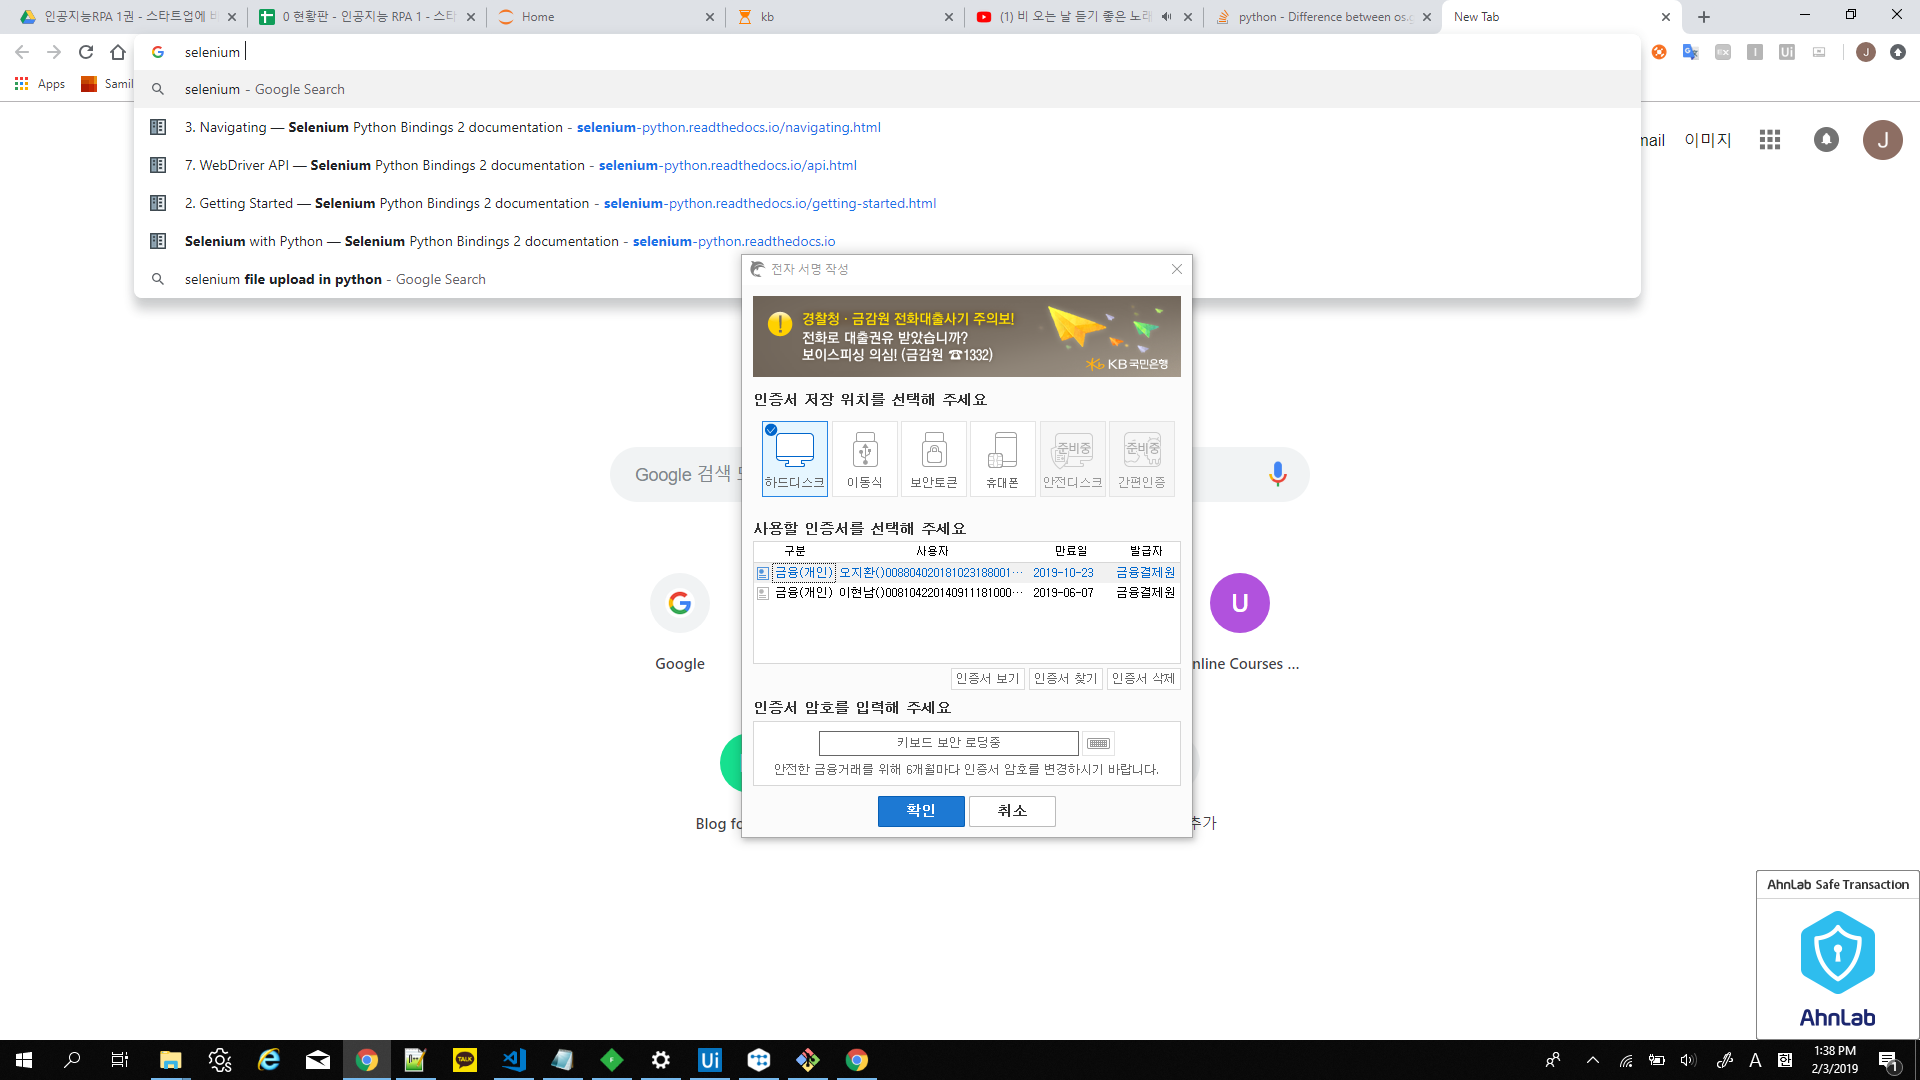

In [4]:
options = Options()
# chrome user agent를 지정해주기
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.113 Safari/537.36")


driver = webdriver.Chrome(driver_path, options=options)

driver.get('https://obank.kbstar.com/quics?page=C055068&QSL=F#loading')

cookies = driver.get_cookies()

driver.maximize_window()
button_for_login = driver.find_element_by_xpath("//button[@class='btn'][@title='새창']")
button_for_login.click()

# 공인인증서를 위한 sleep 3초 
time.sleep(4)

pyautogui.screenshot('kb/current.png')

In [4]:
template_for_certificate = cv2.imread('kb/certificate.png', 0)
template_for_password = cv2.imread('kb/password.png', 0)
template_for_button = cv2.imread('kb/button.png', 0)
print(template_for_certificate.shape)
print(template_for_certificate.shape[::-1])

(24, 425)
(425, 24)


In [5]:
img_rgb = cv2.imread('kb/current.png')
img_grey = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
print(img_grey.shape)

w, h = template_for_certificate.shape[::-1]

print(template_for_certificate.shape, w, h)

(1080, 1920)
(24, 425) 425 24


### 공인인증서 선택

In [7]:
location_for_certificate = template_match(img_grey, template_for_certificate)
draw_rectangle(img_rgb, template_for_certificate, location_for_certificate)
click_location = get_click_location(template_for_certificate, location_for_certificate)
cv2.imwrite('kb/res.png',img_rgb)
pyautogui.click(click_location)

### 비밀번호 입력

In [10]:
location_for_password = template_match(img_grey, template_for_password)
draw_rectangle(img_rgb, template_for_password, location_for_password)
click_location = get_click_location(template_for_password, location_for_password)
cv2.imwrite('kb/res.png',img_rgb)
pyautogui.click(click_location)
pyautogui.typewrite(certificate_password)

### click button

In [11]:
location_for_button = template_match(img_grey, template_for_button)
draw_rectangle(img_rgb, template_for_button, location_for_button)
click_location = get_click_location(template_for_button, location_for_button)
cv2.imwrite('kb/res.png',img_rgb)
pyautogui.click(click_location)